In [1]:
import analyse
import os
import re
import importlib
import MDAnalysis as mda
import MDAnalysis.analysis.rms as rms
import MDAnalysis.analysis.hbonds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def save_figure(fig, target):
    fig.savefig(target)

In [3]:
# importlib.reload(analyse)

#### Define work folder:

In [4]:
PDB_CODE = '4N6H'
SEQ = 'A'
folder = '../'+PDB_CODE+SEQ+'/'
results_folder = folder+'results/'
plot_folder = results_folder+'plots/'

#### Load trajectory files:

In [5]:
prod_file_count = len(sorted([results_folder+'namd/'+i for i in os.listdir(results_folder+'namd/') if re.match(r'(step7.).*\_production.dcd$', i)]))
prod_dcd = [results_folder+'namd/step7.'+str(i)+'_production.dcd' for i in range(1,prod_file_count+1)]
eq_dcd = [results_folder+'namd/step6.'+str(i)+'_equilibration.dcd' for i in range(1,7)]
all_dcd = list(np.concatenate((eq_dcd, prod_dcd)))
print(all_dcd)

['../4N6HA/results/namd/step6.1_equilibration.dcd', '../4N6HA/results/namd/step6.2_equilibration.dcd', '../4N6HA/results/namd/step6.3_equilibration.dcd', '../4N6HA/results/namd/step6.4_equilibration.dcd', '../4N6HA/results/namd/step6.5_equilibration.dcd', '../4N6HA/results/namd/step6.6_equilibration.dcd', '../4N6HA/results/namd/step7.1_production.dcd', '../4N6HA/results/namd/step7.2_production.dcd', '../4N6HA/results/namd/step7.3_production.dcd']


### RMSD of all trajectory:

/Users/evabertalan/miniconda3/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:272: UserWarning: Serial numbers went over 100,000.  Higher serials have been guessed
  warnings.warn("Serial numbers went over 100,000.  "
/Users/evabertalan/miniconda3/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:349: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, bonds will not"
/Users/evabertalan/miniconda3/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:187: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, "


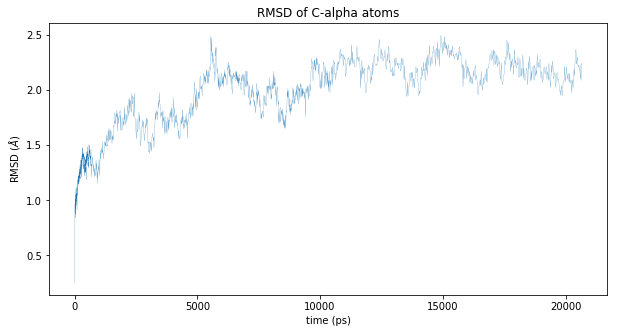

In [7]:
all_traj =  mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', all_dcd)
# ref = mda.Universe(folder+PDB_CODE+'_inp.pdb')
ref = mda.Universe(results_folder+'step5_assembly.namd.pdb')

title = 'RMSD of C-alpha atoms'
R, r_fig = analyse.rmsd_traj(all_traj, ref, title)

In [8]:
save_figure(r_fig[0].figure, plot_folder+'all_rmsd')

### RMSD of production steps:

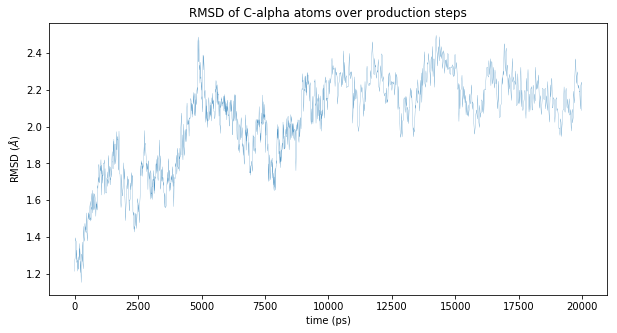

In [9]:
prod_traj = mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', prod_dcd)

title = 'RMSD of C-alpha atoms over production steps'
R, r_fig = analyse.rmsd_traj(prod_traj, ref, title)

In [10]:
save_figure(r_fig[0].figure, plot_folder+'prod_rmsd')

#### PBC

In [11]:
code = PDB_CODE+SEQ
! (cd './tcl' &&  /Applications/VMD\ 1.9.3.app/Contents/Resources/VMD.app/Contents/MacOS/VMD -dispdev text -e pbc.tcl -args $code > pbc_log.out)


### Water count:

In [ ]:
! (cd './tcl' &&  /Applications/VMD\ 1.9.3.app/Contents/Resources/VMD.app/Contents/MacOS/VMD -dispdev text -e water_count.tcl -args $code > water_count_log.out)


In [ ]:
water_files = [results_folder+'namd/step7.'+str(i)+'_production.dcd-pbc.dcd-warter_count.txt' for i in range(1,prod_file_count+1)]
importlib.reload(analyse)
w_fig = analyse.waters_per_frame(water_files)

In [ ]:
save_figure(w_fig[0].figure, plot_folder+'water_within_protein')

#### Structure analysis of the protein:

In [ ]:
pdb_file = folder+PDB_CODE+'_inp.pdb'
struct = analyse.secondary_structure(pdb_file, PDB_CODE)

In [ ]:
print(struct)

### RMSF:

#### RMSF over production steps:

In [ ]:
rmsf_fig = analyse.rmsf_plot([prod_traj], title='RMSF of residues over production step', structure=struct)

In [ ]:
save_figure(rmsf_fig, plot_folder+'prod_rmsf')

#### RMSF of helixes:

In [ ]:
importlib.reload(analyse)

In [ ]:
rmsf_helix = analyse.rmsf_selected_residues([trajectory], struct['helix']-1, title='RMSF of helixes over production step',)

In [ ]:
save_figure(rmsf_helix, plot_folder+'helix_rmsf')

In [ ]:
protein = ref.select_atoms('protein')
print(protein.residues[struct['helix']-1])

In [ ]:
trp = ref.select_atoms('resid 233')
print(trp.residues)

In [ ]:
r = rms.RMSD(trajectory.select_atoms('name CA'),
             ref.select_atoms('name CA'), 
             select='name CA', 
             groupselections=['resname TRP and name CA and resid 233', 'resname SER and name CA']).run()

In [ ]:
R = r.rmsd.T
print(R)
frame = R[0]
time = R[1]
plt.subplots(figsize=(10,5))
plt.plot(time, R[2], linewidth=0.2)
plt.plot(time, R[3], linewidth=0.2)
plt.plot(time, R[4], linewidth=0.2)
plt.show()

In [ ]:
print(ref.select_atoms('resid 233 and name CA')) 

## RMSF of the loops:

In [ ]:
print(struct['helix'])

In [ ]:
r = rms.RMSD(trajectory.select_atoms('name CA'),
             ref.select_atoms('name CA'), 
             select='name CA', 
             groupselections=['name CA and resid 3-32',
                              'name CA and resid 39-67',
                              'name CA and resid 73-105', 
                              'name CA and resid 116-142',
                              'name CA and resid 165-205',
                              'name CA and resid 213-245',
                              'name CA and resid 255-279']).run()

In [ ]:
R = r.rmsd.T
frame = R[0]
time = R[1]
fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(time, R[2], linewidth=0.5, label='1 TM')
ax.plot(time, R[3], linewidth=0.5, label='2 TM')
ax.plot(time, R[4], linewidth=0.5, label='3 TM')
ax.plot(time, R[5], linewidth=0.5, label='4 TM')
ax.plot(time, R[6], linewidth=0.5, label='5 TM')
ax.plot(time, R[7], linewidth=0.5, label='6 TM')
ax.plot(time, R[8], linewidth=0.5, label='7 TM')
ax.legend()
plt.show()

In [ ]:
save_figure(fig, plot_folder+'helix_rmsd')

### RMSD of important residues

In [ ]:
r = rms.RMSD(trajectory.select_atoms('name CA'),
             ref.select_atoms('name CA'), 
             select='name CA', 
             groupselections=['name CA and resid 84',
                              'name CA and resid 156',
                              'name CA and resid 173', 
                              'name CA and resid 233']).run()

In [ ]:
R = r.rmsd.T
frame = R[0]
time = R[1]
fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(time, R[2], linewidth=0.5, label='D138')
ax.plot(time, R[3], linewidth=0.5, label='C210')
ax.plot(time, R[4], linewidth=0.5, label='K227')
ax.plot(time, R[5], linewidth=0.5, label='W287')
ax.legend()
plt.show()

In [ ]:
save_figure(fig, plot_folder+'residue_rmsd')

### RMSF of helixes:

In [ ]:
h_prot = mda.analysis.hbonds.HydrogenBondAnalysis(trajectory, selection1='protein',
                                                  selection2='protein',
                                             selection1_type='both',
                                             distance=3.0)
h_prot.run()

In [ ]:
h_prot.generate_table()
df = pd.DataFrame.from_records(h_prot.table)
df.hist(column=["distance"])
print(df)

In [ ]:
plt.subplots(figsize=(20,20))
bob = plt.hist2d(h_prot.table['donor_resid'], h_prot.table['acceptor_resid'], bins=280)

In [ ]:
inter_hbond = by_t_df.loc[(by_t_df['frequency'] > 1.5) & (by_t_df['donor_resid'] != by_t_df['acceptor_resid'])]
print(inter_hbond)